##  Detection de contour d'une image 

          1. Contour avec gradiant de l'image Naif
          
          2. contour avec gradiant de l'image avance 
             2.1. Masque sobel 
             2.2 Masque prewitt
             
          3. Approximation au deriver second 
             3.1 Laplacine -4
             3.1 Laplacine -8

1. Contour avec gradiant de l'image Naif

In [1]:
#Convertion de l'image en niveau de gris avec pillow
#coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from math import pi,exp
import statistics
from  math import  sqrt , log10
import random as rd
import math


imageGradianrNaif=Image.open('lenna.jpg')
gray_imageGradiantNaif=imageGradianrNaif.convert('L')
gray_image_array_filtre_GradiantNaif=np.array(gray_imageGradiantNaif)


In [2]:
#Redimenssionnement de la matrice 

def redimenssionner_matrice(matrice_initiale):
    dim=matrice_initiale.shape
    n_row=dim[0] 
    n_col=dim[1]
    while ((n_row % 3 )!=0):
        n_row=n_row-1
        n_col=n_col-1

    matrice_initiale=matrice_initiale[0:n_row,0:n_col]
    n_row_sur_dimenssionner=n_row+2
    n_col_sur_dimenssionner=n_col+2

    matrice_sur_dimenssionner=np.zeros((n_row_sur_dimenssionner,n_col_sur_dimenssionner))
    matrice_sur_dimenssionner[1:(n_row_sur_dimenssionner-1),1:(n_col_sur_dimenssionner-1)]=matrice_initiale[0:n_row,0:n_col]
    
    return matrice_sur_dimenssionner , matrice_initiale



In [3]:
#Appel de la fonction 

matrice_redimenssionnerGradiantNaif=redimenssionner_matrice(matrice_initiale=gray_image_array_filtre_GradiantNaif)


In [4]:
#calcule de la derivee de l'image dans la direction (ox)
def fx(matrice_sur_dimenssionner):
    
    dim=matrice_sur_dimenssionner.shape
    n_row=dim[0]-2
    n_col=dim[1]-2

    matrice_convoluer=np.zeros((n_row,n_col))
    M=np.zeros((1,3))
    
    M[0,0]=0
    M[0,1]=-1
    M[0,2]=1

    for i in np.arange(1,n_row+1):
        for j in np.arange(1,n_col+1):

            matrice_convoluer[i-1,j-1]=matrice_sur_dimenssionner[i+1,j]*M[0,2]+matrice_sur_dimenssionner[i,j]*M[0,1]+matrice_sur_dimenssionner[i-1,j]*M[0,0]



    return matrice_convoluer



In [5]:
#calcule de la derivee de l'image dans la direction (oy)

def fy(matrice_sur_dimenssionner):
    
    dim=matrice_sur_dimenssionner.shape
    n_row=dim[0]-2
    n_col=dim[1]-2

    matrice_convoluer=np.zeros((n_row,n_col))
    M=np.zeros((3,1))
    
    M[0,0]=0
    M[1,0]=-1
    M[2,0]=1

    for i in np.arange(1,n_row+1):
        for j in np.arange(1,n_col+1):

            matrice_convoluer[i-1,j-1]=matrice_sur_dimenssionner[i,j-1]*M[0,0]+matrice_sur_dimenssionner[i,j]*M[1,0]+matrice_sur_dimenssionner[i,j+1]*M[2,0]



    return matrice_convoluer

In [6]:
def norme_gradiant_matrice_gradiant_naif(matrice_sur_dimenssionner):
    matrice_fx=fx(matrice_sur_dimenssionner)
    matrice_fy=fy(matrice_sur_dimenssionner)

    n_row=matrice_fx.shape[0]
    n_col=matrice_fx.shape[1]

    matrice_f=np.zeros((n_row, n_col))

    for i in np.arange(0, n_row):
        for j in np.arange(0, n_col):
            matrice_f[i,j]=sqrt(matrice_fx[i,j]**2 + matrice_fy[i,j]**2 )

    return matrice_f


In [7]:
#Appel de la fonction 

matrice_contour_gradiant_naif=norme_gradiant_matrice_gradiant_naif(matrice_sur_dimenssionner=matrice_redimenssionnerGradiantNaif[0])



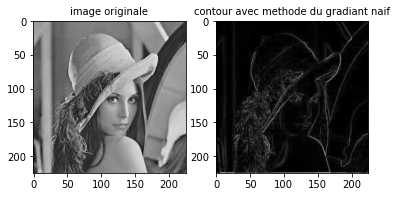

In [8]:
plt.subplot(1,2,1)
plt.imshow(gray_image_array_filtre_GradiantNaif,cmap='gray', vmin = 0, vmax = 256)
plt.title("image originale",fontsize=10)

plt.subplot(1,2,2)
plt.imshow(matrice_contour_gradiant_naif,cmap='gray', vmin = 0, vmax = 256)
plt.title("contour avec methode du gradiant naif",fontsize=10)

plt.show(block=True)

2. contour avec gradiant de l'image

2.1. Masque sobel 

In [9]:
#Convertion de l'image en niveau de gris avec pillow

imageGradiantAvancer=Image.open('lenna.jpg')
gray_imageGradiantAvancer=imageGradiantAvancer.convert('L')
gray_image_array_filtre_GradiantAvancer=np.array(gray_imageGradiantAvancer)


In [10]:
matrice_redimenssionnerGradiantAvancer=redimenssionner_matrice(matrice_initiale=gray_image_array_filtre_GradiantAvancer)


In [11]:

def fx(matrice_sur_dimenssionner):
    
    dim=matrice_sur_dimenssionner.shape
    n_row=dim[0]-2
    n_col=dim[1]-2

    matrice_convoluer=np.zeros((n_row,n_col))
    M=np.zeros((1,3))
    
    M[0,0]=-1
    M[0,1]=0
    M[0,2]=1

    for i in np.arange(1,n_row+1):
        for j in np.arange(1,n_col+1):

            matrice_convoluer[i-1,j-1]=matrice_sur_dimenssionner[i+1,j]*M[0,2]+matrice_sur_dimenssionner[i,j]*M[0,1]+matrice_sur_dimenssionner[i-1,j]*M[0,0]



    return matrice_convoluer


def fy(matrice_sur_dimenssionner):
    
    dim=matrice_sur_dimenssionner.shape
    n_row=dim[0]-2
    n_col=dim[1]-2

    matrice_convoluer=np.zeros((n_row,n_col))
    M=np.zeros((3,1))
    
    M[0,0]=-1
    M[1,0]=0
    M[2,0]=1

    for i in np.arange(1,n_row+1):
        for j in np.arange(1,n_col+1):

            matrice_convoluer[i-1,j-1]=matrice_sur_dimenssionner[i,j-1]*M[0,0]+matrice_sur_dimenssionner[i,j]*M[1,0]+matrice_sur_dimenssionner[i,j+1]*M[2,0]



    return matrice_convoluer

def norme_gradiant_matrice_gradiant_avancer(matrice_sur_dimenssionner):
    matrice_fx=fx(matrice_sur_dimenssionner)
    matrice_fy=fy(matrice_sur_dimenssionner)

    n_row=matrice_fx.shape[0]
    n_col=matrice_fx.shape[1]

    matrice_f=np.zeros((n_row, n_col))

    for i in np.arange(0, n_row):
        for j in np.arange(0, n_col):
            matrice_f[i,j]=sqrt(matrice_fx[i,j]**2 + matrice_fy[i,j]**2 )

    return matrice_f



In [12]:

matrice_contour_gradiant_avancer=norme_gradiant_matrice_gradiant_avancer(matrice_sur_dimenssionner=matrice_redimenssionnerGradiantAvancer[0])


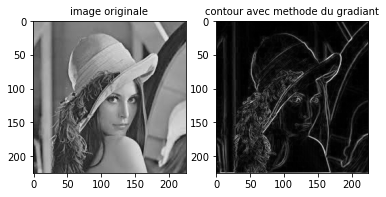

In [13]:
plt.subplot(1,2,1)
plt.imshow(gray_image_array_filtre_GradiantAvancer,cmap='gray', vmin = 0, vmax = 256)
plt.title("image originale",fontsize=10)

plt.subplot(1,2,2)
plt.imshow(matrice_contour_gradiant_avancer,cmap='gray', vmin = 0, vmax = 256)
plt.title("contour avec methode du gradiant",fontsize=10)

plt.show(block=True)

2.2 Masque prewitt

In [21]:
#Convertion de l'image en niveau de gris avec pillow

imagePrewitt=Image.open('lenna.jpg')
gray_imagePrewitt=imagePrewitt.convert('L')
gray_image_array_filtre_Prewitt=np.array(gray_imagePrewitt)

In [22]:
matrice_redimenssionnerPrewitt=redimenssionner_matrice(matrice_initiale=gray_image_array_filtre_Prewitt)


In [23]:

def fx(matrice_sur_dimenssionner):
    
    dim=matrice_sur_dimenssionner.shape
    n_row=dim[0]-2
    n_col=dim[1]-2

    matrice_convoluer=np.zeros((n_row,n_col))
    M=np.zeros((3,3))
    M_tild=np.zeros((3,3))

    M[0,0]=1
    M[0,1]=0
    M[0,2]=-1

    M[1,0]=1
    M[1,1]=0
    M[1,2]=-1

    M[2,0]=1
    M[2,1]=0
    M[2,2]=-1

    M_tild[0,0]=M[2,2]
    M_tild[0,1]=M[2,1]
    M_tild[0,2]=M[2,0]

    M_tild[1,0]=M[1,2]
    M_tild[1,1]=M[1,1]
    M_tild[1,2]=M[1,0]

    M_tild[2,0]=M[0,2]
    M_tild[2,1]=M[0,1]
    M_tild[2,2]=M[0,0]

    for i in np.arange(1,n_row+1):
        for j in np.arange(1,n_col+1):

            ##matrice_convoluer[i,j]=matrice_initiale[i-1,j-1]*M_tild[0,0]+matrice_initiale[i-1,j]*M_tild[0,1]+matrice_initiale[i-1,j+1]*M_tild[0,2]+matrice_initiale[i,j-1]*M_tild[1,0]+matrice_initiale[i,j+1]*M_tild[1,2]+matrice_initiale[i+1,j-1]*M_tild[2,0]+matrice_initiale[i+1,j]*M_tild[2,1]+ matrice_initiale[i+1,j+1]*M_tild[2,2]+matrice_initiale[i,j]*M_tild[1,1]
            ##matrice_convoluer[i,j]=matrice_initiale[i-1,j-1]*M_tild[0,0]+matrice_initiale[i-1,j]*M_tild[1,0]+matrice_initiale[i-1,j+1]*M_tild[2,0]+matrice_initiale[i,j-1]*M_tild[0,1]+matrice_initiale[i,j+1]*M_tild[2,1]+matrice_initiale[i+1,j-1]*M_tild[0,2]+matrice_initiale[i+1,j]*M_tild[1,2]+ matrice_initiale[i+1,j+1]*M_tild[2,2]+matrice_initiale[i,j]*M_tild[1,1]
            valeurDeConvolution=matrice_sur_dimenssionner[i-1,j-1]*M_tild[0,0]+matrice_sur_dimenssionner[i-1,j]*M_tild[1,0]+matrice_sur_dimenssionner[i-1,j+1]*M_tild[2,0]+matrice_sur_dimenssionner[i,j-1]*M_tild[0,1]+matrice_sur_dimenssionner[i,j+1]*M_tild[2,1]+matrice_sur_dimenssionner[i+1,j-1]*M_tild[0,2]+matrice_sur_dimenssionner[i+1,j]*M_tild[1,2]+ matrice_sur_dimenssionner[i+1,j+1]*M_tild[2,2]+matrice_sur_dimenssionner[i,j]*M_tild[1,1]
            if valeurDeConvolution > 255:
                
                matrice_convoluer[i-1,j-1]=255
            
            elif valeurDeConvolution < 0:
                matrice_convoluer[i-1,j-1]=0
            else:
                matrice_convoluer[i-1,j-1]=valeurDeConvolution



    return matrice_convoluer


def fy(matrice_sur_dimenssionner):
    
    dim=matrice_sur_dimenssionner.shape
    n_row=dim[0]-2
    n_col=dim[1]-2

    matrice_convoluer=np.zeros((n_row,n_col))
    M=np.zeros((3,3))
    M_tild=np.zeros((3,3))

    M[0,0]=1
    M[0,1]=1
    M[0,2]=1

    M[1,0]=0
    M[1,1]=0
    M[1,2]=0

    M[2,0]=-1
    M[2,1]=-1
    M[2,2]=-1

    M_tild[0,0]=M[2,2]
    M_tild[0,1]=M[2,1]
    M_tild[0,2]=M[2,0]

    M_tild[1,0]=M[1,2]
    M_tild[1,1]=M[1,1]
    M_tild[1,2]=M[1,0]

    M_tild[2,0]=M[0,2]
    M_tild[2,1]=M[0,1]
    M_tild[2,2]=M[0,0]

    for i in np.arange(1,n_row+1):
        for j in np.arange(1,n_col+1):

            ##matrice_convoluer[i,j]=matrice_initiale[i-1,j-1]*M_tild[0,0]+matrice_initiale[i-1,j]*M_tild[0,1]+matrice_initiale[i-1,j+1]*M_tild[0,2]+matrice_initiale[i,j-1]*M_tild[1,0]+matrice_initiale[i,j+1]*M_tild[1,2]+matrice_initiale[i+1,j-1]*M_tild[2,0]+matrice_initiale[i+1,j]*M_tild[2,1]+ matrice_initiale[i+1,j+1]*M_tild[2,2]+matrice_initiale[i,j]*M_tild[1,1]
            ##matrice_convoluer[i,j]=matrice_initiale[i-1,j-1]*M_tild[0,0]+matrice_initiale[i-1,j]*M_tild[1,0]+matrice_initiale[i-1,j+1]*M_tild[2,0]+matrice_initiale[i,j-1]*M_tild[0,1]+matrice_initiale[i,j+1]*M_tild[2,1]+matrice_initiale[i+1,j-1]*M_tild[0,2]+matrice_initiale[i+1,j]*M_tild[1,2]+ matrice_initiale[i+1,j+1]*M_tild[2,2]+matrice_initiale[i,j]*M_tild[1,1]
            valeurDeConvolution=matrice_sur_dimenssionner[i-1,j-1]*M_tild[0,0]+matrice_sur_dimenssionner[i-1,j]*M_tild[1,0]+matrice_sur_dimenssionner[i-1,j+1]*M_tild[2,0]+matrice_sur_dimenssionner[i,j-1]*M_tild[0,1]+matrice_sur_dimenssionner[i,j+1]*M_tild[2,1]+matrice_sur_dimenssionner[i+1,j-1]*M_tild[0,2]+matrice_sur_dimenssionner[i+1,j]*M_tild[1,2]+ matrice_sur_dimenssionner[i+1,j+1]*M_tild[2,2]+matrice_sur_dimenssionner[i,j]*M_tild[1,1]
            if valeurDeConvolution > 255:
                
                matrice_convoluer[i-1,j-1]=255
            
            elif valeurDeConvolution < 0:
                matrice_convoluer[i-1,j-1]=0
            else:
                matrice_convoluer[i-1,j-1]=valeurDeConvolution




    return matrice_convoluer

def norme_gradiant_matrice_prewitt(matrice_sur_dimenssionner):
    matrice_fx=fx(matrice_sur_dimenssionner)
    matrice_fy=fy(matrice_sur_dimenssionner)

    n_row=matrice_fx.shape[0]
    n_col=matrice_fx.shape[1]

    matrice_f=np.zeros((n_row, n_col))

    for i in np.arange(0, n_row):
        for j in np.arange(0, n_col):
            matrice_f[i,j]=sqrt(matrice_fx[i,j]**2 + matrice_fy[i,j]**2 )

    return matrice_f




In [24]:
matrice_contour_prewitt=norme_gradiant_matrice_prewitt(matrice_sur_dimenssionner=matrice_redimenssionnerPrewitt[0])
matrice_contour_prewitt=matrice_contour_prewitt.astype(int)

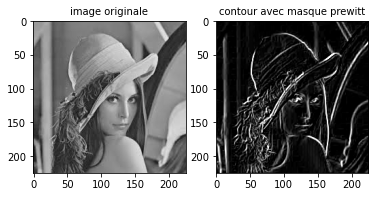

In [25]:
plt.subplot(1,2,1)
plt.imshow(gray_image_array_filtre_Prewitt,cmap='gray', vmin = 0, vmax = 256)
plt.title("image originale",fontsize=10)

plt.subplot(1,2,2)
plt.imshow(matrice_contour_prewitt,cmap='gray', vmin = 0, vmax = 256)
plt.title("contour avec masque prewitt",fontsize=10)

plt.show(block=True)


 3. Approximation au deriver second 
     3.1 Laplacine -4
    

In [29]:
#Convertion de l'image en niveau de gris avec pillow

imageLaplacien4=Image.open('lenna.jpg')
gray_imageimageLaplacien4=imageLaplacien4.convert('L')
gray_image_array_filtre_Laplacien4=np.array(gray_imageimageLaplacien4)


In [30]:
matrice_redimenssionnerLaplacien4=redimenssionner_matrice(matrice_initiale=gray_image_array_filtre_Laplacien4)

In [31]:

def fx(matrice_sur_dimenssionner):
    
    dim=matrice_sur_dimenssionner.shape
    n_row=dim[0]-2
    n_col=dim[1]-2

    matrice_convoluer=np.zeros((n_row,n_col))
    M=np.zeros((3,3))
    M_tild=np.zeros((3,3))

    M[0,0]=0
    M[0,1]=1
    M[0,2]=0

    M[1,0]=1
    M[1,1]=-4
    M[1,2]=0

    M[2,0]=0
    M[2,1]=1
    M[2,2]=0

    M_tild[0,0]=M[2,2]
    M_tild[0,1]=M[2,1]
    M_tild[0,2]=M[2,0]

    M_tild[1,0]=M[1,2]
    M_tild[1,1]=M[1,1]
    M_tild[1,2]=M[1,0]

    M_tild[2,0]=M[0,2]
    M_tild[2,1]=M[0,1]
    M_tild[2,2]=M[0,0]

    for i in np.arange(1,n_row+1):
        for j in np.arange(1,n_col+1):

            ##matrice_convoluer[i,j]=matrice_initiale[i-1,j-1]*M_tild[0,0]+matrice_initiale[i-1,j]*M_tild[0,1]+matrice_initiale[i-1,j+1]*M_tild[0,2]+matrice_initiale[i,j-1]*M_tild[1,0]+matrice_initiale[i,j+1]*M_tild[1,2]+matrice_initiale[i+1,j-1]*M_tild[2,0]+matrice_initiale[i+1,j]*M_tild[2,1]+ matrice_initiale[i+1,j+1]*M_tild[2,2]+matrice_initiale[i,j]*M_tild[1,1]
            ##matrice_convoluer[i,j]=matrice_initiale[i-1,j-1]*M_tild[0,0]+matrice_initiale[i-1,j]*M_tild[1,0]+matrice_initiale[i-1,j+1]*M_tild[2,0]+matrice_initiale[i,j-1]*M_tild[0,1]+matrice_initiale[i,j+1]*M_tild[2,1]+matrice_initiale[i+1,j-1]*M_tild[0,2]+matrice_initiale[i+1,j]*M_tild[1,2]+ matrice_initiale[i+1,j+1]*M_tild[2,2]+matrice_initiale[i,j]*M_tild[1,1]
            valeurDeConvolution=matrice_sur_dimenssionner[i-1,j-1]*M_tild[0,0]+matrice_sur_dimenssionner[i-1,j]*M_tild[1,0]+matrice_sur_dimenssionner[i-1,j+1]*M_tild[2,0]+matrice_sur_dimenssionner[i,j-1]*M_tild[0,1]+matrice_sur_dimenssionner[i,j+1]*M_tild[2,1]+matrice_sur_dimenssionner[i+1,j-1]*M_tild[0,2]+matrice_sur_dimenssionner[i+1,j]*M_tild[1,2]+ matrice_sur_dimenssionner[i+1,j+1]*M_tild[2,2]+matrice_sur_dimenssionner[i,j]*M_tild[1,1]
            if valeurDeConvolution > 255:
                
                matrice_convoluer[i-1,j-1]=255
            
            elif valeurDeConvolution < 0:
                matrice_convoluer[i-1,j-1]=0
            else:
                matrice_convoluer[i-1,j-1]=valeurDeConvolution



    return matrice_convoluer


def fy(matrice_sur_dimenssionner):
    
    dim=matrice_sur_dimenssionner.shape
    n_row=dim[0]-2
    n_col=dim[1]-2

    matrice_convoluer=np.zeros((n_row,n_col))
    M=np.zeros((3,3))
    M_tild=np.zeros((3,3))

    M[0,0]=0
    M[0,1]=1
    M[0,2]=0

    M[1,0]=1
    M[1,1]=-4
    M[1,2]=1

    M[2,0]=0
    M[2,1]=0
    M[2,2]=0

    M_tild[0,0]=M[2,2]
    M_tild[0,1]=M[2,1]
    M_tild[0,2]=M[2,0]

    M_tild[1,0]=M[1,2]
    M_tild[1,1]=M[1,1]
    M_tild[1,2]=M[1,0]

    M_tild[2,0]=M[0,2]
    M_tild[2,1]=M[0,1]
    M_tild[2,2]=M[0,0]

    for i in np.arange(1,n_row+1):
        for j in np.arange(1,n_col+1):

            ##matrice_convoluer[i,j]=matrice_initiale[i-1,j-1]*M_tild[0,0]+matrice_initiale[i-1,j]*M_tild[0,1]+matrice_initiale[i-1,j+1]*M_tild[0,2]+matrice_initiale[i,j-1]*M_tild[1,0]+matrice_initiale[i,j+1]*M_tild[1,2]+matrice_initiale[i+1,j-1]*M_tild[2,0]+matrice_initiale[i+1,j]*M_tild[2,1]+ matrice_initiale[i+1,j+1]*M_tild[2,2]+matrice_initiale[i,j]*M_tild[1,1]
            ##matrice_convoluer[i,j]=matrice_initiale[i-1,j-1]*M_tild[0,0]+matrice_initiale[i-1,j]*M_tild[1,0]+matrice_initiale[i-1,j+1]*M_tild[2,0]+matrice_initiale[i,j-1]*M_tild[0,1]+matrice_initiale[i,j+1]*M_tild[2,1]+matrice_initiale[i+1,j-1]*M_tild[0,2]+matrice_initiale[i+1,j]*M_tild[1,2]+ matrice_initiale[i+1,j+1]*M_tild[2,2]+matrice_initiale[i,j]*M_tild[1,1]
            valeurDeConvolution=matrice_sur_dimenssionner[i-1,j-1]*M_tild[0,0]+matrice_sur_dimenssionner[i-1,j]*M_tild[1,0]+matrice_sur_dimenssionner[i-1,j+1]*M_tild[2,0]+matrice_sur_dimenssionner[i,j-1]*M_tild[0,1]+matrice_sur_dimenssionner[i,j+1]*M_tild[2,1]+matrice_sur_dimenssionner[i+1,j-1]*M_tild[0,2]+matrice_sur_dimenssionner[i+1,j]*M_tild[1,2]+ matrice_sur_dimenssionner[i+1,j+1]*M_tild[2,2]+matrice_sur_dimenssionner[i,j]*M_tild[1,1]
            if valeurDeConvolution > 255:
                
                matrice_convoluer[i-1,j-1]=255
            
            elif valeurDeConvolution < 0:
                matrice_convoluer[i-1,j-1]=0
            else:
                matrice_convoluer[i-1,j-1]=valeurDeConvolution



    return matrice_convoluer

def norme_laplacien_matrice(matrice_sur_dimenssionner):
    matrice_fx=fx(matrice_sur_dimenssionner)
    matrice_fy=fy(matrice_sur_dimenssionner)

    n_row=matrice_fx.shape[0]
    n_col=matrice_fx.shape[1]

    matrice_f=np.zeros((n_row, n_col))

    for i in np.arange(0, n_row):
        for j in np.arange(0, n_col):
            matrice_f[i,j]=sqrt(matrice_fx[i,j]**2 + matrice_fy[i,j]**2 )

    return matrice_f




In [32]:
matrice_laplacien_contour=norme_laplacien_matrice(matrice_sur_dimenssionner=matrice_redimenssionnerLaplacien4[0])


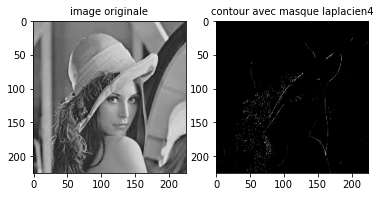

In [33]:
plt.subplot(1,2,1)
plt.imshow(gray_image_array_filtre_Laplacien4,cmap='gray', vmin = 0, vmax = 256)
plt.title("image originale",fontsize=10)

plt.subplot(1,2,2)
plt.imshow(matrice_laplacien_contour,cmap='gray', vmin = 0, vmax = 256)
plt.title("contour avec masque laplacien4",fontsize=10)

plt.show(block=True)


3.1 Laplacine -8


In [34]:
#Convertion de l'image en niveau de gris avec pillow

imageLaplacien8=Image.open('lenna.jpg')
gray_imageimageLaplacien8=imageLaplacien8.convert('L')
gray_image_array_filtre_Laplacien8=np.array(gray_imageimageLaplacien8)


In [35]:
matrice_redimenssionnerLaplacien8=redimenssionner_matrice(matrice_initiale=gray_image_array_filtre_Laplacien8)

In [36]:

def fx(matrice_sur_dimenssionner):
    
    dim=matrice_sur_dimenssionner.shape
    n_row=dim[0]-2
    n_col=dim[1]-2

    matrice_convoluer=np.zeros((n_row,n_col))
    M=np.zeros((3,3))
    M_tild=np.zeros((3,3))

    M[0,0]=1
    M[0,1]=1
    M[0,2]=1

    M[1,0]=1
    M[1,1]=-8
    M[1,2]=1

    M[2,0]=1
    M[2,1]=1
    M[2,2]=1

    M_tild[0,0]=M[2,2]
    M_tild[0,1]=M[2,1]
    M_tild[0,2]=M[2,0]

    M_tild[1,0]=M[1,2]
    M_tild[1,1]=M[1,1]
    M_tild[1,2]=M[1,0]

    M_tild[2,0]=M[0,2]
    M_tild[2,1]=M[0,1]
    M_tild[2,2]=M[0,0]

    for i in np.arange(1,n_row+1):
        for j in np.arange(1,n_col+1):

            ##matrice_convoluer[i,j]=matrice_initiale[i-1,j-1]*M_tild[0,0]+matrice_initiale[i-1,j]*M_tild[0,1]+matrice_initiale[i-1,j+1]*M_tild[0,2]+matrice_initiale[i,j-1]*M_tild[1,0]+matrice_initiale[i,j+1]*M_tild[1,2]+matrice_initiale[i+1,j-1]*M_tild[2,0]+matrice_initiale[i+1,j]*M_tild[2,1]+ matrice_initiale[i+1,j+1]*M_tild[2,2]+matrice_initiale[i,j]*M_tild[1,1]
            ##matrice_convoluer[i,j]=matrice_initiale[i-1,j-1]*M_tild[0,0]+matrice_initiale[i-1,j]*M_tild[1,0]+matrice_initiale[i-1,j+1]*M_tild[2,0]+matrice_initiale[i,j-1]*M_tild[0,1]+matrice_initiale[i,j+1]*M_tild[2,1]+matrice_initiale[i+1,j-1]*M_tild[0,2]+matrice_initiale[i+1,j]*M_tild[1,2]+ matrice_initiale[i+1,j+1]*M_tild[2,2]+matrice_initiale[i,j]*M_tild[1,1]
            valeurDeConvolution=matrice_sur_dimenssionner[i-1,j-1]*M_tild[0,0]+matrice_sur_dimenssionner[i-1,j]*M_tild[1,0]+matrice_sur_dimenssionner[i-1,j+1]*M_tild[2,0]+matrice_sur_dimenssionner[i,j-1]*M_tild[0,1]+matrice_sur_dimenssionner[i,j+1]*M_tild[2,1]+matrice_sur_dimenssionner[i+1,j-1]*M_tild[0,2]+matrice_sur_dimenssionner[i+1,j]*M_tild[1,2]+ matrice_sur_dimenssionner[i+1,j+1]*M_tild[2,2]+matrice_sur_dimenssionner[i,j]*M_tild[1,1]
            if valeurDeConvolution > 255:
                
                matrice_convoluer[i-1,j-1]=255
            
            elif valeurDeConvolution < 0:
                matrice_convoluer[i-1,j-1]=0
            else:
                matrice_convoluer[i-1,j-1]=valeurDeConvolution




    return matrice_convoluer


def fy(matrice_sur_dimenssionner):
    
    dim=matrice_sur_dimenssionner.shape
    n_row=dim[0]-2
    n_col=dim[1]-2

    matrice_convoluer=np.zeros((n_row,n_col))
    M=np.zeros((3,3))
    M_tild=np.zeros((3,3))

    M[0,0]=1
    M[0,1]=1
    M[0,2]=1

    M[1,0]=1
    M[1,1]=-8
    M[1,2]=1

    M[2,0]=1
    M[2,1]=1
    M[2,2]=1

    M_tild[0,0]=M[2,2]
    M_tild[0,1]=M[2,1]
    M_tild[0,2]=M[2,0]

    M_tild[1,0]=M[1,2]
    M_tild[1,1]=M[1,1]
    M_tild[1,2]=M[1,0]

    M_tild[2,0]=M[0,2]
    M_tild[2,1]=M[0,1]
    M_tild[2,2]=M[0,0]

    for i in np.arange(1,n_row+1):
        for j in np.arange(1,n_col+1):

            ##matrice_convoluer[i,j]=matrice_initiale[i-1,j-1]*M_tild[0,0]+matrice_initiale[i-1,j]*M_tild[0,1]+matrice_initiale[i-1,j+1]*M_tild[0,2]+matrice_initiale[i,j-1]*M_tild[1,0]+matrice_initiale[i,j+1]*M_tild[1,2]+matrice_initiale[i+1,j-1]*M_tild[2,0]+matrice_initiale[i+1,j]*M_tild[2,1]+ matrice_initiale[i+1,j+1]*M_tild[2,2]+matrice_initiale[i,j]*M_tild[1,1]
            ##matrice_convoluer[i,j]=matrice_initiale[i-1,j-1]*M_tild[0,0]+matrice_initiale[i-1,j]*M_tild[1,0]+matrice_initiale[i-1,j+1]*M_tild[2,0]+matrice_initiale[i,j-1]*M_tild[0,1]+matrice_initiale[i,j+1]*M_tild[2,1]+matrice_initiale[i+1,j-1]*M_tild[0,2]+matrice_initiale[i+1,j]*M_tild[1,2]+ matrice_initiale[i+1,j+1]*M_tild[2,2]+matrice_initiale[i,j]*M_tild[1,1]
            valeurDeConvolution=matrice_sur_dimenssionner[i-1,j-1]*M_tild[0,0]+matrice_sur_dimenssionner[i-1,j]*M_tild[1,0]+matrice_sur_dimenssionner[i-1,j+1]*M_tild[2,0]+matrice_sur_dimenssionner[i,j-1]*M_tild[0,1]+matrice_sur_dimenssionner[i,j+1]*M_tild[2,1]+matrice_sur_dimenssionner[i+1,j-1]*M_tild[0,2]+matrice_sur_dimenssionner[i+1,j]*M_tild[1,2]+ matrice_sur_dimenssionner[i+1,j+1]*M_tild[2,2]+matrice_sur_dimenssionner[i,j]*M_tild[1,1]
            if valeurDeConvolution > 255:
                
                matrice_convoluer[i-1,j-1]=255
            
            elif valeurDeConvolution < 0:
                matrice_convoluer[i-1,j-1]=0
            else:
                matrice_convoluer[i-1,j-1]=valeurDeConvolution



    return matrice_convoluer

def norme_laplacien_matrice(matrice_sur_dimenssionner):
    matrice_fx=fx(matrice_sur_dimenssionner)
    matrice_fy=fy(matrice_sur_dimenssionner)

    n_row=matrice_fx.shape[0]
    n_col=matrice_fx.shape[1]

    matrice_f=np.zeros((n_row, n_col))

    for i in np.arange(0, n_row):
        for j in np.arange(0, n_col):
            matrice_f[i,j]=sqrt(matrice_fx[i,j]**2 + matrice_fy[i,j]**2 )

    return matrice_f


In [37]:

matrice_laplacien_contour=norme_laplacien_matrice(matrice_sur_dimenssionner=matrice_redimenssionnerLaplacien8[0])
matrice_laplacien_contour=matrice_laplacien_contour.astype(int)


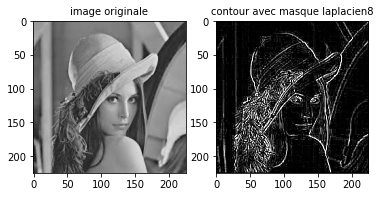

In [38]:
plt.subplot(1,2,1)
plt.imshow(gray_image_array_filtre_Laplacien8,cmap='gray', vmin = 0, vmax = 256)
plt.title("image originale",fontsize=10)

plt.subplot(1,2,2)
plt.imshow(matrice_laplacien_contour,cmap='gray', vmin = 0, vmax = 256)
plt.title("contour avec masque laplacien8",fontsize=10)

plt.show(block=True)
